In [1]:
import pandas as pd
import re
from collections import Counter
from textblob import TextBlob

In [2]:
df = pd.read_csv('tweets_with_vader_scores.csv').reset_index(drop=True)


In [3]:
df

,ids,tweet_id,date,flag,user,tweet,vader_score
0,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...,-0.7269
1,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,dived many times ball managed save rest go bounds,0.4939
2,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,whole body feels itchy like fire,-0.2500
3,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,behaving im mad cant see,-0.4939
4,5,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,whole crew,0.0000
...,...,...,...,...,...,...,...
1590338,1590339,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,woke school best feeling ever,0.6908
1590339,1590340,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,thewdbcom cool hear old walt interviews,0.3182
1590340,1590341,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,ready mojo makeover ask details,0.3612
1590341,1590342,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,happy th birthday boo alll time tupac amaru sh...,0.5719


In [4]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])
# Calculatint the time difference
time_difference = df['date'].iloc[-1] - df['date'].iloc[0]

# Print the result
print('First tweet send out the 2009-04-06 22:19:49 and last one  2009-06-16 08:40:50')

# Print the result
print('Total time difference:',time_difference)

First tweet send out the 2009-04-06 22:19:49 and last one  2009-06-16 08:40:50
Total time difference: 70 days 10:21:01


## This is not correct the last day of the sequence is not the 16th of June is the 25th!!
## Reordering the dataset based on date:

In [5]:
import pandas as pd

# Assuming df is your DataFrame
# Convert 'date' to datetime format if it's not already
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df = df.sort_values(by='date')

# Print the last few entries to verify the actual latest date
print(df.tail())

# Extract just the date part from the datetime
df['just_date'] = df['date'].dt.date

# Get distinct days
distinct_days = df['just_date'].unique()

# Display the distinct days and the actual latest date
print("Distinct Days:", distinct_days)
print("Actual Latest Date:", df['date'].iloc[-1])


           ids    tweet_id                date      flag          user  \
796328  796329  2329204987 2009-06-25 10:28:28  NO_QUERY     360cookie   
796330  796331  2329205038 2009-06-25 10:28:28  NO_QUERY       bigenya   
796332  796333  2329205574 2009-06-25 10:28:30  NO_QUERY  davidlmulder   
796331  796332  2329205473 2009-06-25 10:28:30  NO_QUERY      LeeLHoke   
796333  796334  2329205794 2009-06-25 10:28:31  NO_QUERY    tpchandler   

                                                    tweet  vader_score  
796328  tried get mutant fawkes follow wouldnt lonely ...       0.2755  
796330                                              gmail       0.0000  
796332         sounds like rival flagging ads much though       0.3612  
796331                              rest peace farrah sad       0.1027  
796333  resit exams summer wishes worked harder first ...       0.1531  
Distinct Days: [datetime.date(2009, 4, 6) datetime.date(2009, 4, 7)
 datetime.date(2009, 4, 17) datetime.date(2009, 4

In [6]:
df

,ids,tweet_id,date,flag,user,tweet,vader_score,just_date
0,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...,-0.7269,2009-04-06
1,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,dived many times ball managed save rest go bounds,0.4939,2009-04-06
2,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,whole body feels itchy like fire,-0.2500,2009-04-06
3,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,behaving im mad cant see,-0.4939,2009-04-06
4,5,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,whole crew,0.0000,2009-04-06
...,...,...,...,...,...,...,...,...
796328,796329,2329204987,2009-06-25 10:28:28,NO_QUERY,360cookie,tried get mutant fawkes follow wouldnt lonely ...,0.2755,2009-06-25
796330,796331,2329205038,2009-06-25 10:28:28,NO_QUERY,bigenya,gmail,0.0000,2009-06-25
796332,796333,2329205574,2009-06-25 10:28:30,NO_QUERY,davidlmulder,sounds like rival flagging ads much though,0.3612,2009-06-25
796331,796332,2329205473,2009-06-25 10:28:30,NO_QUERY,LeeLHoke,rest peace farrah sad,0.1027,2009-06-25


In [7]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])
# Calculatint the time difference
time_difference = df['date'].iloc[-1] - df['date'].iloc[0]

# Print the result
print('First tweet send out the 2009-04-06 22:19:49 and last one  2009-06-16 08:40:50')

# Print the result
print('Total time difference:',time_difference)

First tweet send out the 2009-04-06 22:19:49 and last one  2009-06-16 08:40:50
Total time difference: 79 days 12:08:42


## Reseting `Index` and `Ids`:

In [8]:
# Reset the index and drop the old one
df = df.reset_index(drop=True)

In [9]:
# Resetting the 'ids' column to have a sequential count starting from 1
df['ids'] = range(1, len(df) + 1)

In [10]:
df

,ids,tweet_id,date,flag,user,tweet,vader_score,just_date
0,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...,-0.7269,2009-04-06
1,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,dived many times ball managed save rest go bounds,0.4939,2009-04-06
2,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,whole body feels itchy like fire,-0.2500,2009-04-06
3,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,behaving im mad cant see,-0.4939,2009-04-06
4,5,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,whole crew,0.0000,2009-04-06
...,...,...,...,...,...,...,...,...
1590338,1590339,2329204987,2009-06-25 10:28:28,NO_QUERY,360cookie,tried get mutant fawkes follow wouldnt lonely ...,0.2755,2009-06-25
1590339,1590340,2329205038,2009-06-25 10:28:28,NO_QUERY,bigenya,gmail,0.0000,2009-06-25
1590340,1590341,2329205574,2009-06-25 10:28:30,NO_QUERY,davidlmulder,sounds like rival flagging ads much though,0.3612,2009-06-25
1590341,1590342,2329205473,2009-06-25 10:28:30,NO_QUERY,LeeLHoke,rest peace farrah sad,0.1027,2009-06-25


C:\Users\jose\AppData\Local\Temp\ipykernel_8172\1296069942.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts['date'] = pd.to_datetime(df_ts['date'])


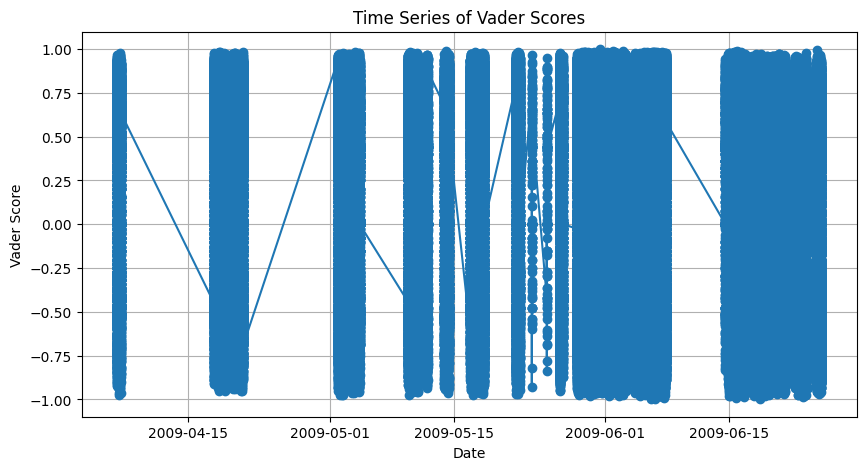

In [14]:

import matplotlib.pyplot as plt


# Creating a dataframe for the time series
df_ts = df[['date', 'vader_score']]

# Convert the 'date' column to datetime
df_ts['date'] = pd.to_datetime(df_ts['date'])

# Sort the DataFrame by the date to ensure correct time series plotting
df_ts = df_ts.sort_values('date')

# Plotting
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(df_ts['date'], df_ts['vader_score'], marker='o', linestyle='-')
plt.title('Time Series of Vader Scores')
plt.xlabel('Date')
plt.ylabel('Vader Score')
plt.grid(True)
plt.show()


## Resampling the Data to Weekly Averages

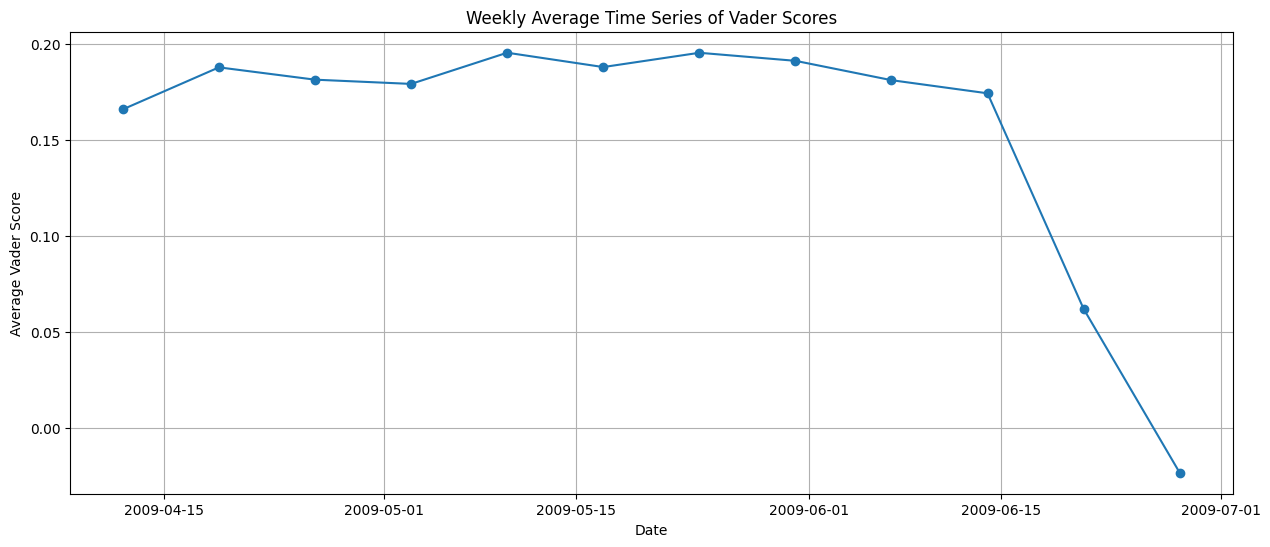

In [16]:

# Assuming 'new_df' is your DataFrame
df_ts['date'] = pd.to_datetime(df_ts['date'])
df_ts = df_ts.sort_values('date')

# Resample to weekly averages
weekly_df = df_ts.resample('W', on='date').mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(weekly_df.index, weekly_df['vader_score'], marker='o', linestyle='-')
plt.title('Weekly Average Time Series of Vader Scores')
plt.xlabel('Date')
plt.ylabel('Average Vader Score')
plt.grid(True)
plt.show()


## Applying a Rolling Mean

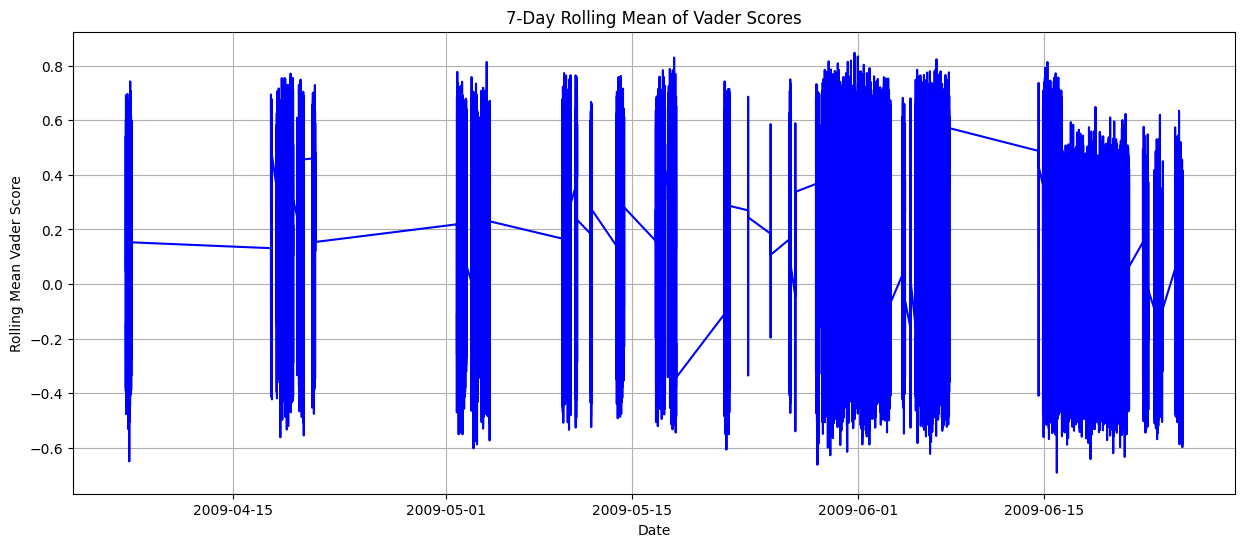

In [17]:
# Applying a 7-day rolling mean
df_ts['rolling_mean'] = df_ts['vader_score'].rolling(window=7).mean()

# Plotting the rolling mean
plt.figure(figsize=(15, 6))
plt.plot(df_ts['date'], df_ts['rolling_mean'], marker='', linestyle='-', color='blue')
plt.title('7-Day Rolling Mean of Vader Scores')
plt.xlabel('Date')
plt.ylabel('Rolling Mean Vader Score')
plt.grid(True)
plt.show()


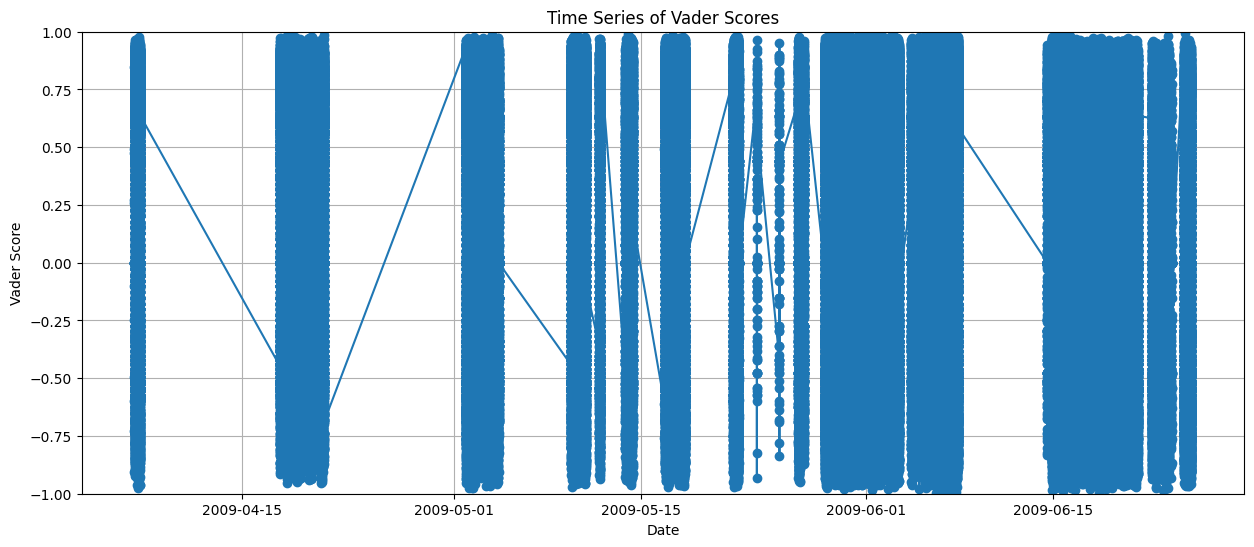

In [19]:
# Adjusting y-axis limits
plt.figure(figsize=(15, 6))
plt.plot(df_ts['date'], df_ts['vader_score'], marker='o', linestyle='-')
plt.title('Time Series of Vader Scores')
plt.xlabel('Date')
plt.ylabel('Vader Score')
plt.ylim(-1, 1)  # Set y-axis limits to ensure all data points are visible
plt.grid(True)
plt.show()


## Day average approach:

In [50]:
df['date'] = pd.to_datetime(df['date'])
# Strip time part to just keep the date
df['day'] = df['date'].dt.date

KeyError: 'date'

In [51]:
# Group by the date and count tweets
sentiment_average = df.groupby('day')['vader_score'].mean()


KeyError: 'day'

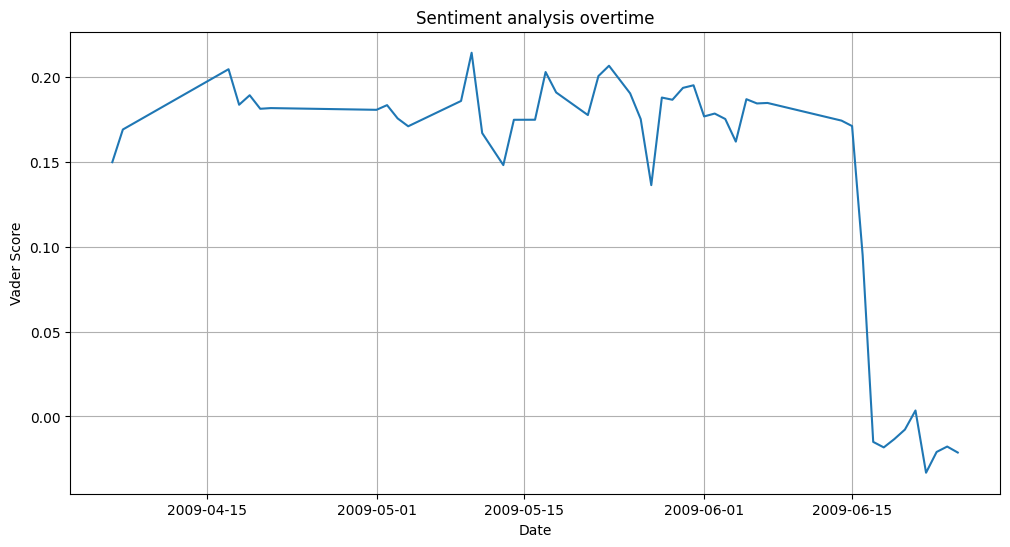

In [22]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sentiment_average.index, sentiment_average.values)
plt.title('Sentiment analysis overtime')
plt.xlabel('Date')
plt.ylabel('Vader Score')
plt.grid(True)
plt.show()

In [52]:
df = sentiment_average.copy()

In [53]:
df = df.reset_index()
df.columns = ['date', 'vader_score']  # Rename the columns

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         48 non-null     object 
 1   vader_score  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 900.0+ bytes


C:\Users\jose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 1000x800 with 0 Axes>

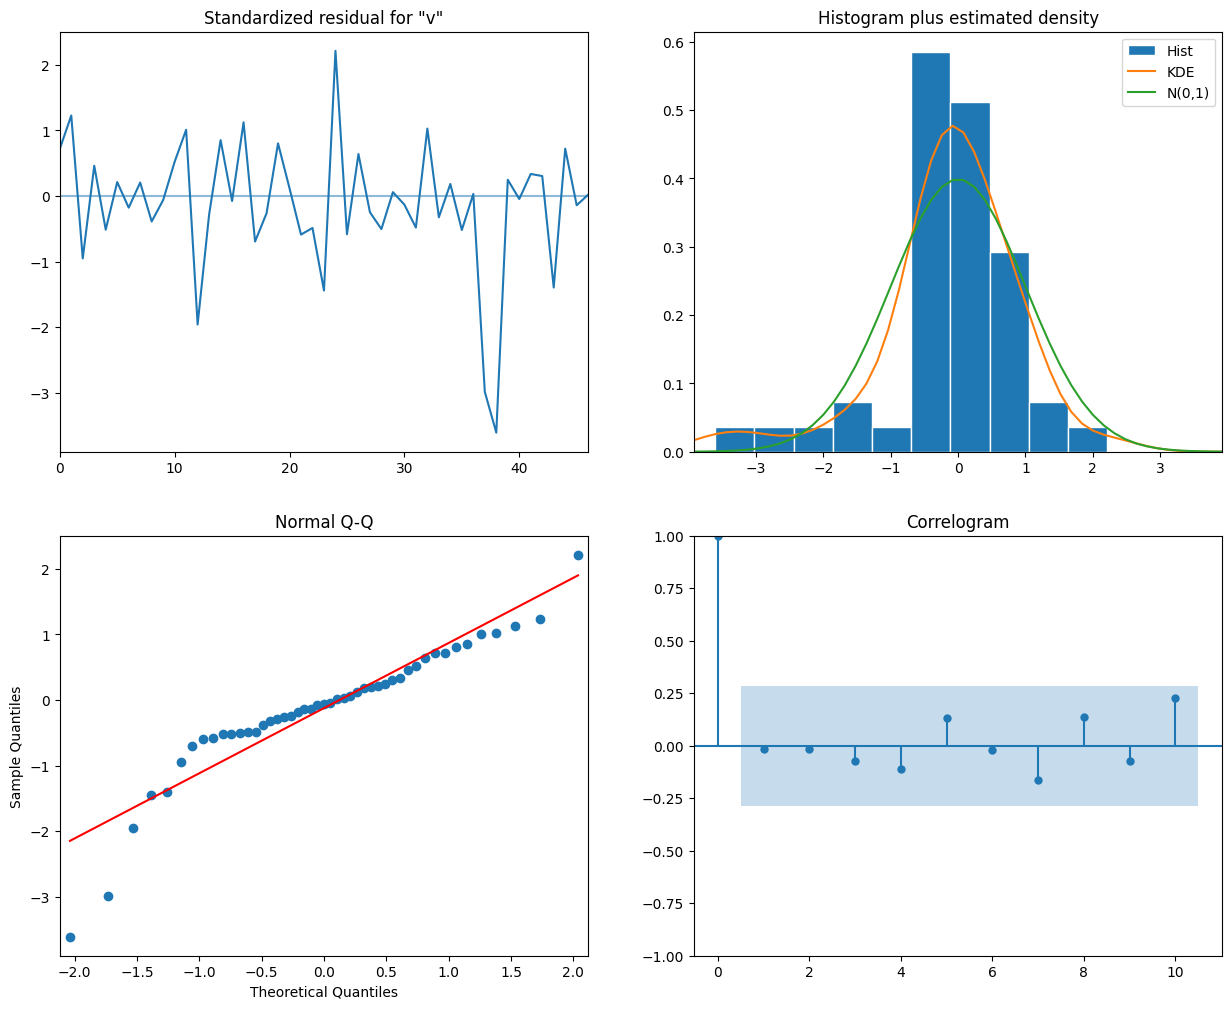

In [55]:

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Fit the ARIMA model
model = ARIMA(df['vader_score'], order=(1,1,1))  # Starting with some typical parameters
fitted_model = model.fit()

# Plot the diagnostics
plt.figure(figsize=(10, 8))
fitted_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [56]:
# Forecasting with ARIMA model
forecast_days = [1, 3, 7]  # 1 day, 3 days, and 7 days ahead
forecasts = {}

for days in forecast_days:
    # ARIMA Forecast
    forecast_result = fitted_model.get_forecast(steps=days)
    forecasts[days] = forecast_result.predicted_mean

# Display the forecasts
forecasts


C:\Users\jose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\jose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\jose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\jose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


{1: 48   -0.019107
 dtype: float64,
 3: 48   -0.019107
 49   -0.020171
 50   -0.019642
 Name: predicted_mean, dtype: float64,
 7: 48   -0.019107
 49   -0.020171
 50   -0.019642
 51   -0.019905
 52   -0.019774
 53   -0.019839
 54   -0.019807
 Name: predicted_mean, dtype: float64}

##  ARIMA

Epoch 1/100
47/47 - 2s - loss: 0.4285 - 2s/epoch - 48ms/step
Epoch 2/100
47/47 - 0s - loss: 0.1700 - 53ms/epoch - 1ms/step
Epoch 3/100
47/47 - 0s - loss: 0.0515 - 51ms/epoch - 1ms/step
Epoch 4/100
47/47 - 0s - loss: 0.0346 - 49ms/epoch - 1ms/step
Epoch 5/100
47/47 - 0s - loss: 0.0324 - 53ms/epoch - 1ms/step
Epoch 6/100
47/47 - 0s - loss: 0.0301 - 56ms/epoch - 1ms/step
Epoch 7/100
47/47 - 0s - loss: 0.0281 - 57ms/epoch - 1ms/step
Epoch 8/100
47/47 - 0s - loss: 0.0259 - 53ms/epoch - 1ms/step
Epoch 9/100
47/47 - 0s - loss: 0.0239 - 51ms/epoch - 1ms/step
Epoch 10/100
47/47 - 0s - loss: 0.0222 - 51ms/epoch - 1ms/step
Epoch 11/100
47/47 - 0s - loss: 0.0208 - 50ms/epoch - 1ms/step
Epoch 12/100
47/47 - 0s - loss: 0.0193 - 50ms/epoch - 1ms/step
Epoch 13/100
47/47 - 0s - loss: 0.0186 - 50ms/epoch - 1ms/step
Epoch 14/100
47/47 - 0s - loss: 0.0167 - 49ms/epoch - 1ms/step
Epoch 15/100
47/47 - 0s - loss: 0.0160 - 52ms/epoch - 1ms/step
Epoch 16/100
47/47 - 0s - loss: 0.0150 - 63ms/epoch - 1ms/step
Ep

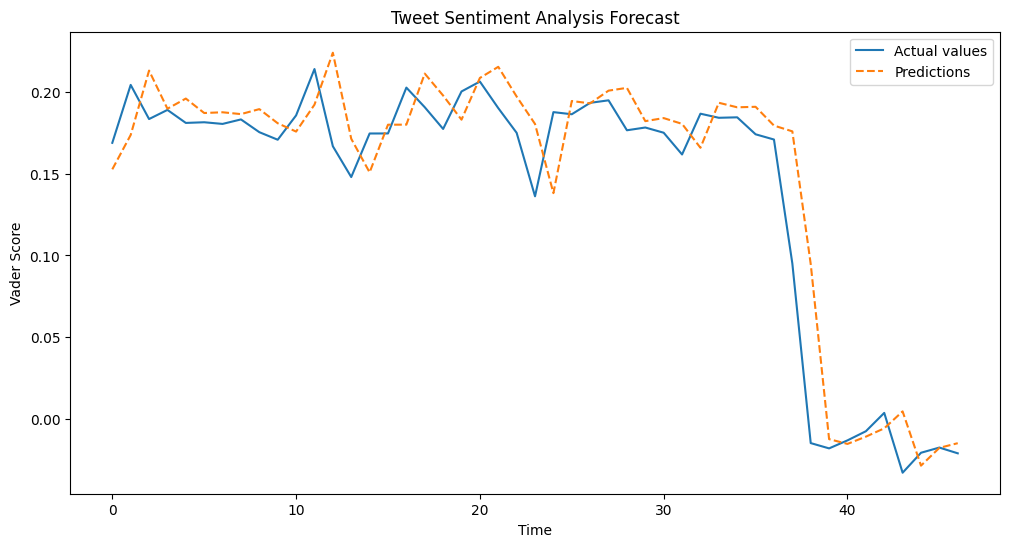

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


df['date'] = pd.date_range(start='2009-04-06', periods=len(df), freq='D')
df.set_index('date', inplace=True)

# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['vader_score'].values.reshape(-1,1))

# Data for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X, Y = create_dataset(scaled_data, look_back)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Trainnig the model
model.fit(X, Y, epochs=100, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)
Y_actual = scaler.inverse_transform([Y])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(Y_actual[0], label='Actual values')
plt.plot(train_predict[:,0], linestyle='--', label='Predictions')
plt.title('Tweet Sentiment Analysis Forecast')
plt.xlabel('Time')
plt.ylabel('Vader Score')
plt.legend()
plt.show()


## Sarima

<Figure size 1400x700 with 0 Axes>

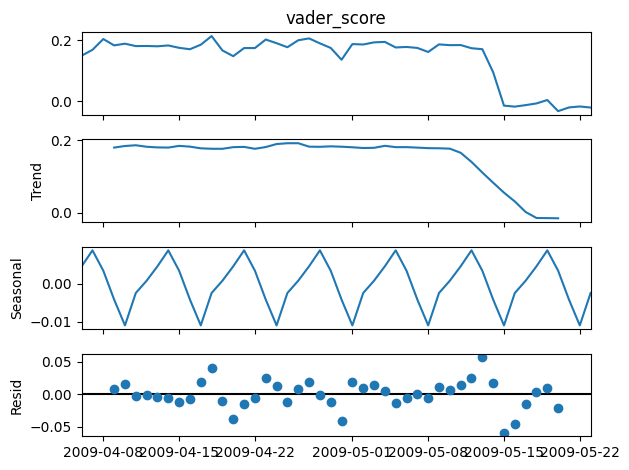

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal Decomposition
result = seasonal_decompose(df['vader_score'], model='additive', period=7)  # Weekly seasonality assumption

# Plot the seasonal decomposition
plt.figure(figsize=(14, 7))
result.plot()
plt.show()


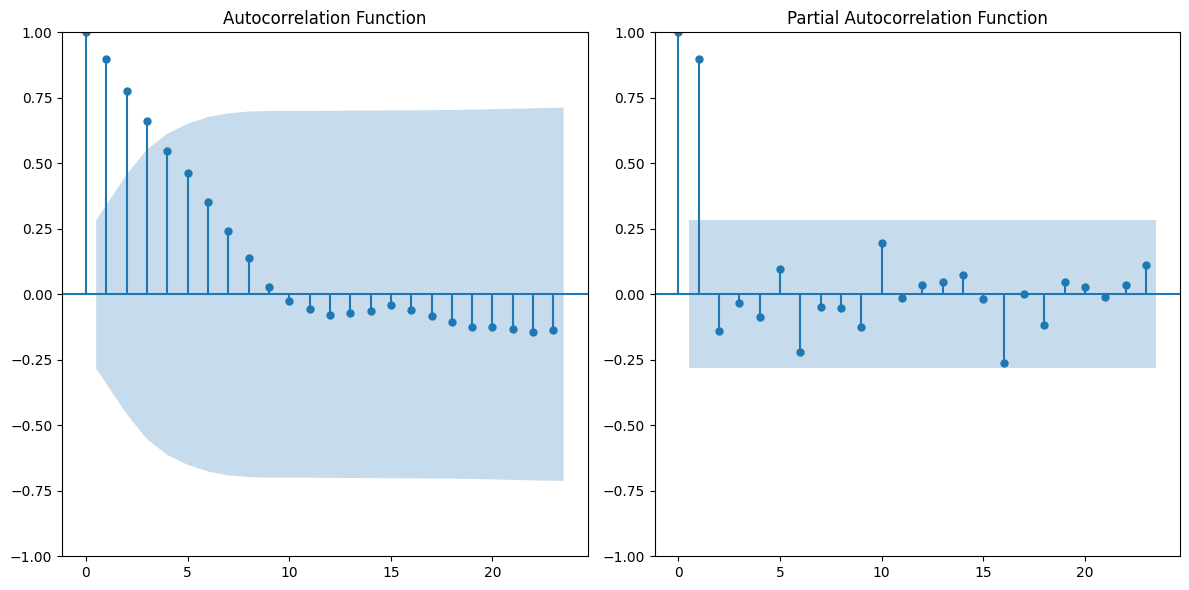

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Reducing the number of lags for the ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['vader_score'], lags=23, ax=plt.gca())  # Corrected number of lags
plt.title('Autocorrelation Function')

plt.subplot(122)
plot_pacf(df['vader_score'], lags=23, ax=plt.gca())  # Corrected number of lags
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


C:\Users\jose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jose\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


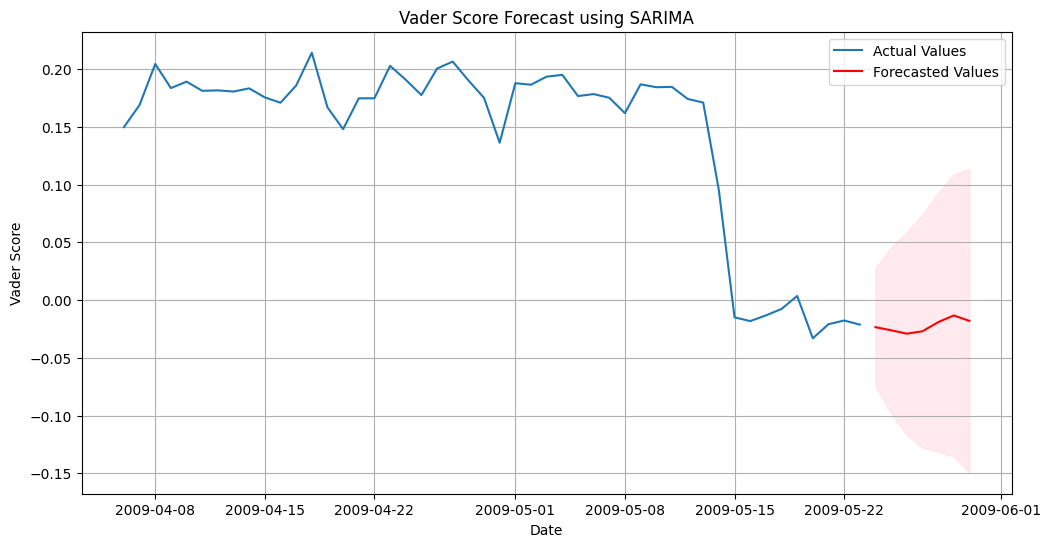

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
sarima_model = SARIMAX(df['vader_score'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 7))
sarima_fit = sarima_model.fit(disp=False)

# Perform a forecast
sarima_forecast = sarima_fit.get_forecast(steps=7)  # Forecasting for the next week
forecast_index = pd.date_range(start=df.index[-1], periods=8, freq='D')[1:]  # Creating index for the forecast days
forecast_mean = sarima_forecast.predicted_mean
forecast_ci = sarima_forecast.conf_int()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df['vader_score'], label='Actual Values')
plt.plot(forecast_index, forecast_mean, label='Forecasted Values', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Vader Score Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Vader Score')
plt.legend()
plt.grid(True)
plt.show()
